<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev3MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree (Árbol de decisión)

Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
MAE: 0.40972583467009155
MSE: 0.33095401951820436
RMSE: 0.5752860327856086
R²: 0.5812196629462618


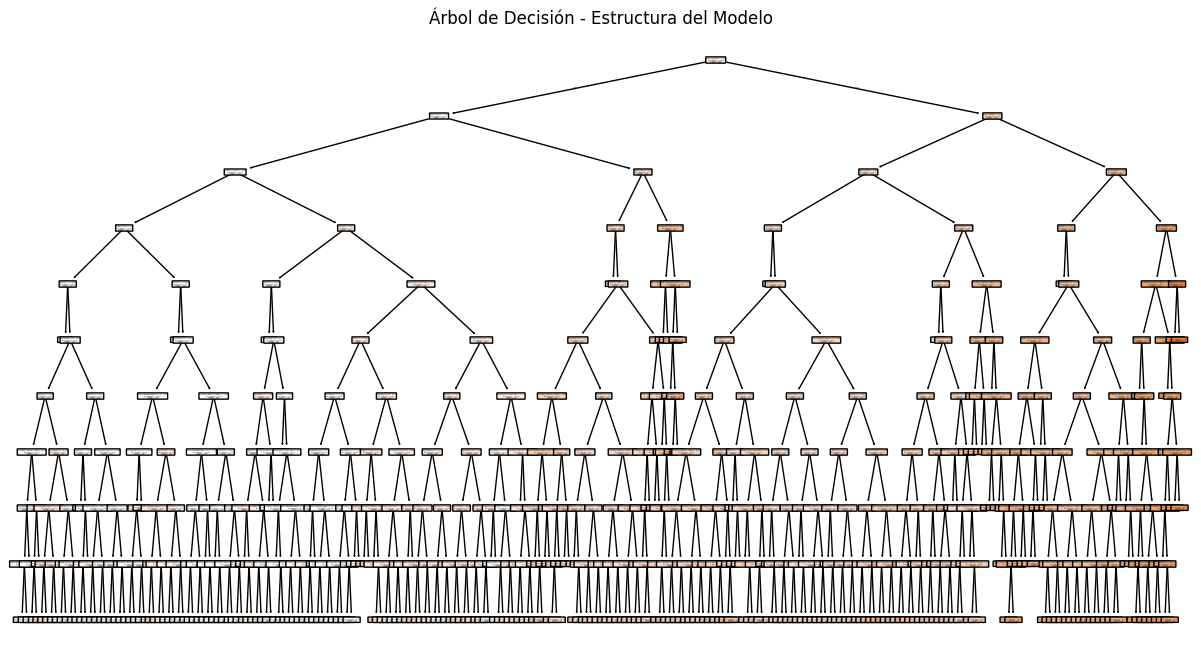

<ipython-input-4-177e2d52e651>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis", legend=False)


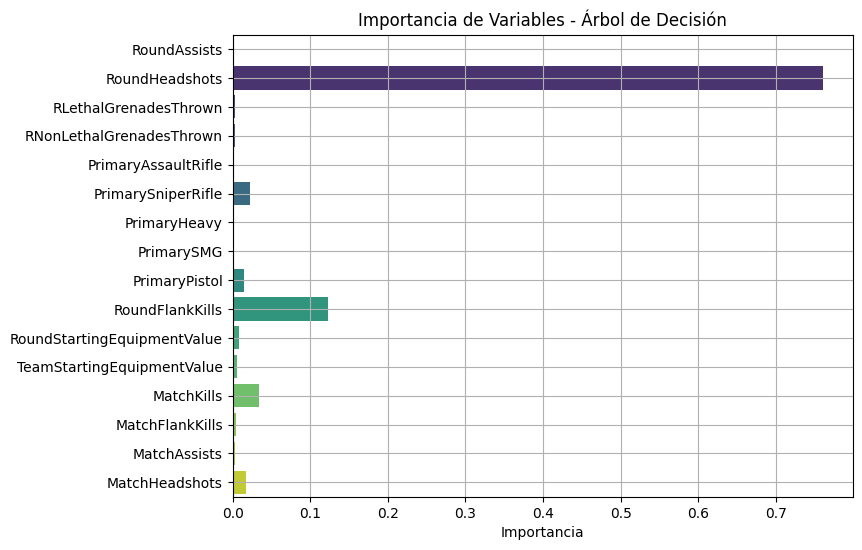

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Paso 2: Cargar el dataset
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Paso 3: Selección de variables predictoras y objetivo
features = ['RoundAssists', 'RoundHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
            'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
            'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

X = df[features]
y = df['RoundKills']

# Paso 4: Convertir todas las columnas a formato numérico antes del entrenamiento
for col in X.columns:
    X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')  # Evita el SettingWithCopyWarning

# Paso 5: Manejo de valores NaN (relleno con la media)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Paso 6: Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 7: División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 8: Búsqueda de hiperparámetros con GridSearchCV
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [5, 10, 15]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Paso 9: Entrenar modelo optimizado con los nuevos hiperparámetros
tree_model = DecisionTreeRegressor(**best_params, random_state=42)
tree_model.fit(X_train, y_train)

# Paso 10: Predicción
y_pred = tree_model.predict(X_test)

# Paso 11: Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mejores Hiperparámetros:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Paso 12: Visualización del Árbol de Decisión
plt.figure(figsize=(15, 8))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True)
plt.title("Árbol de Decisión - Estructura del Modelo")
plt.show()

# Paso 13: Visualización de importancia de variables
importances = tree_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="viridis", legend=False)
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Árbol de Decisión")
plt.grid(True)
plt.show()

El Árbol de Decisión es un modelo que aprende reglas para predecir RoundKills basándose en distintas variables (como RoundHeadshots y RoundAssists). En lugar de una ecuación matemática como la regresión, divide los datos en ramas según los valores más relevantes.

Resultados clave:
* MAE = 0.409 → En promedio, el modelo tiene un error de 0.4 kills, mejorando respecto a la regresión múltiple.
* R² = 0.581 → Explica el 58.1% de la variabilidad, lo que muestra que captura mejor los patrones en los datos.
* Gráfico de importancia: Variables como RoundAssists y RoundHeadshots tienen la mayor influencia en la predicción.

Conclusión:

Este modelo supera a la regresión lineal múltiple, ya que identifica reglas de decisión más precisas.
